#**Flight Ticket Price Prediction**  


##**Introduction:**



Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**Images of Flights**

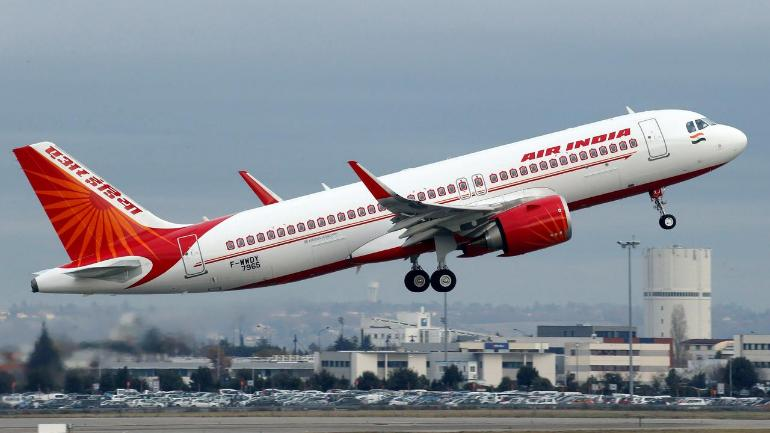

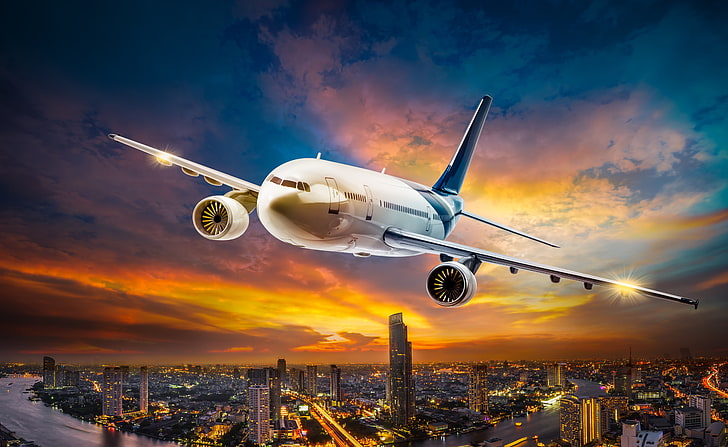

##**Description:**

These data sets contain the information on 10683 flight
 bookings between march to june of 2019. Each observation represents a flight booking.

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

#sns.set()

##**About All Libraries**

**Pandas** is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

**NumPy** is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Plotly Express** provides functions to visualize a variety of types of data.

##**To read the dataset and upload the Excel file from the folder .**

**Here I uploaded Flight dataset of excel and assigned that data set to df_flight object.**

In [ ]:
df_flight=pd.read_excel("/content/Flight_price.xlsx")

**Here I uploaded Flight dataset of excel and assigned that data set to df_flight object.**

In [ ]:
df_flight.shape

(10683, 11)

**Shape** : It shows the shape of the data set that contains how many rows and columns. The Flight dataset consists of 1o683 rows and 11 columns.

In [ ]:
pd.set_option('display.max_columns',None) #sets the maximum number of rows and columns displayed when a frame is pretty-printed,None means no restriction all columns will be displayed.

In [ ]:
df_flight.head()

,Airline,...,Price
0,IndiGo,...,3897
1,Air India,...,7662
2,Jet Airways,...,13882
3,IndiGo,...,6218
4,IndiGo,...,13302


**Observations:-** By default the **head funciton**displays top five records. Depends upon the number what u passed in the paranthesis it displays that much of records.Here we didn't pass any number ,so that it displayed top five records.

In [ ]:
df_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


**tail() : By default it displays last five records from the bottom.The no.of records displayed depends on the number passed in the parameter.**

In [ ]:
df_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## **Columns/Features Description**

**Here each data point corresponds to trip of flight from one city to another.**

*  Airline: The name of the airline.
*  Date_of_Journey: The date of the journey
*  Source: The source from which the service begins.
* Destination: The destination where the service ends.
* Route: The route taken by the flight to reach the destination.
* Dep_Time: The time when the journey starts from the source.
* Arrival_Time: Time of arrival at the destination.
* Duration: Total duration of the flight.
* Total_Stops: Total stops between the source and destination.
* Additional_Info: Additional information about the flight
*  Price(target): The price of the ticket






In [ ]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**info()** : It gives full information about columns.The data type of columns and count of null and non-null values.

**Observations:-**  Here the data set contain 10683 records and 11 features. Only one feature is in int data type and remaining all are in object data type.

Object type:

-> Airline,  Date_of_Journey ,Source ,Destination, Route, Dep_Time ,Arrival_Time,Duration,  Total_Stops, Additional_Info

Int type:
->  Price

Here all columns are object data type except price, price is dependent and all other object columns are independent.So we can't do any analysis on this for that change the data into required manner.

Here we have to change some data types , and add some features which are required to analyse the data.

In [ ]:
df_flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

**The .dtypes property is used to know the data types of the variables in the data set. Pandas stores these variables in different formats according to their type. Pandas stores categorical variables as ‘object’ and, on the other hand, continuous variables are stored as int or float.**

## **To get only categorical variables**

In [ ]:
df_flight.select_dtypes(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


**Observations:-**  It displays the data of only categorical columns.

#**write Categories for each feature using for loop**

In [ ]:
features=df_flight.select_dtypes(include='object').columns
for feature in features:
  print(feature ,':')
  print(df_flight[feature].nunique())
  print(df_flight[feature].unique())
  print('*'*20)

Airline :
12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
********************
Date_of_Journey :
44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
********************
Source :
5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
********************
Destination :
6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
***

**Observations:**  Here it displays the categories of each feature. Ex- Airline feature have 12 categories.

#**write value counts for each feature using for loop**

In [ ]:
features=df_flight.columns
for feature in features:
  print(feature ,':')
  print(df_flight[feature].value_counts())
  print("Total Records :",df_flight[feature].value_counts().sum())
  print('*'*20)

Airline :
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Total Records : 10683
********************
Date_of_Journey :
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3

In [ ]:
df_flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observaitons:-**describe(): It gives statistical information abt all columns.The columns must be data type of continuous.It doesn't shows any values to the categorical variables.Here the min value of lead_time is 0 and max is 737.Here Mean is greater than Median so it clearly says that Right skew data.Same way it shows values for remaining columns.**

In [ ]:
df_flight.skew()

<ipython-input-8-0dc85c172a42>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_flight.skew()


Price    1.812552
dtype: float64

**About Skewness**: 0.5 and 0.5, the distribution of the value is almost symmetrical. -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate. If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.


**Observations:** The Skew value of price is 1.82,as it is greater than 1 we can clearly say ,it's a highly positive skew.

# **Cleaning Data**



1)Finding and Removing duplicated Rows in a DataFrame.

2)Finding missing elements in a DataFrame.

3)Filling the missing values in a DataFrame.

4)Converting columns into appropriate Datatypes.

5)Dropping columns in a DataFrame.

6)Renaming Columns of a DataFrame.

7)Changing the index of a DataFrame.

##**Data Pre-Profiling and Processing**

###**1)Finding and Removing duplicated Rows in a DataFrame.**

In [ ]:
df_flight.duplicated().value_counts()

False    10463
True       220
dtype: int64

**Observations:-** To find out no.of duplicated records in the data set.The data set have 220 duplicate records.

###**2)Finding missing elements in a DataFrame.**

In [ ]:
df_flight.notnull().sum()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

Observations:--**Find the sum of notnull values of each column.Here all columns contain values, there is one null value occur at route and Total_stops
 columns.**

In [ ]:
df_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## **Show the missing values in graph**

Text(0.5, 1.0, 'Distribution of Missing Values')

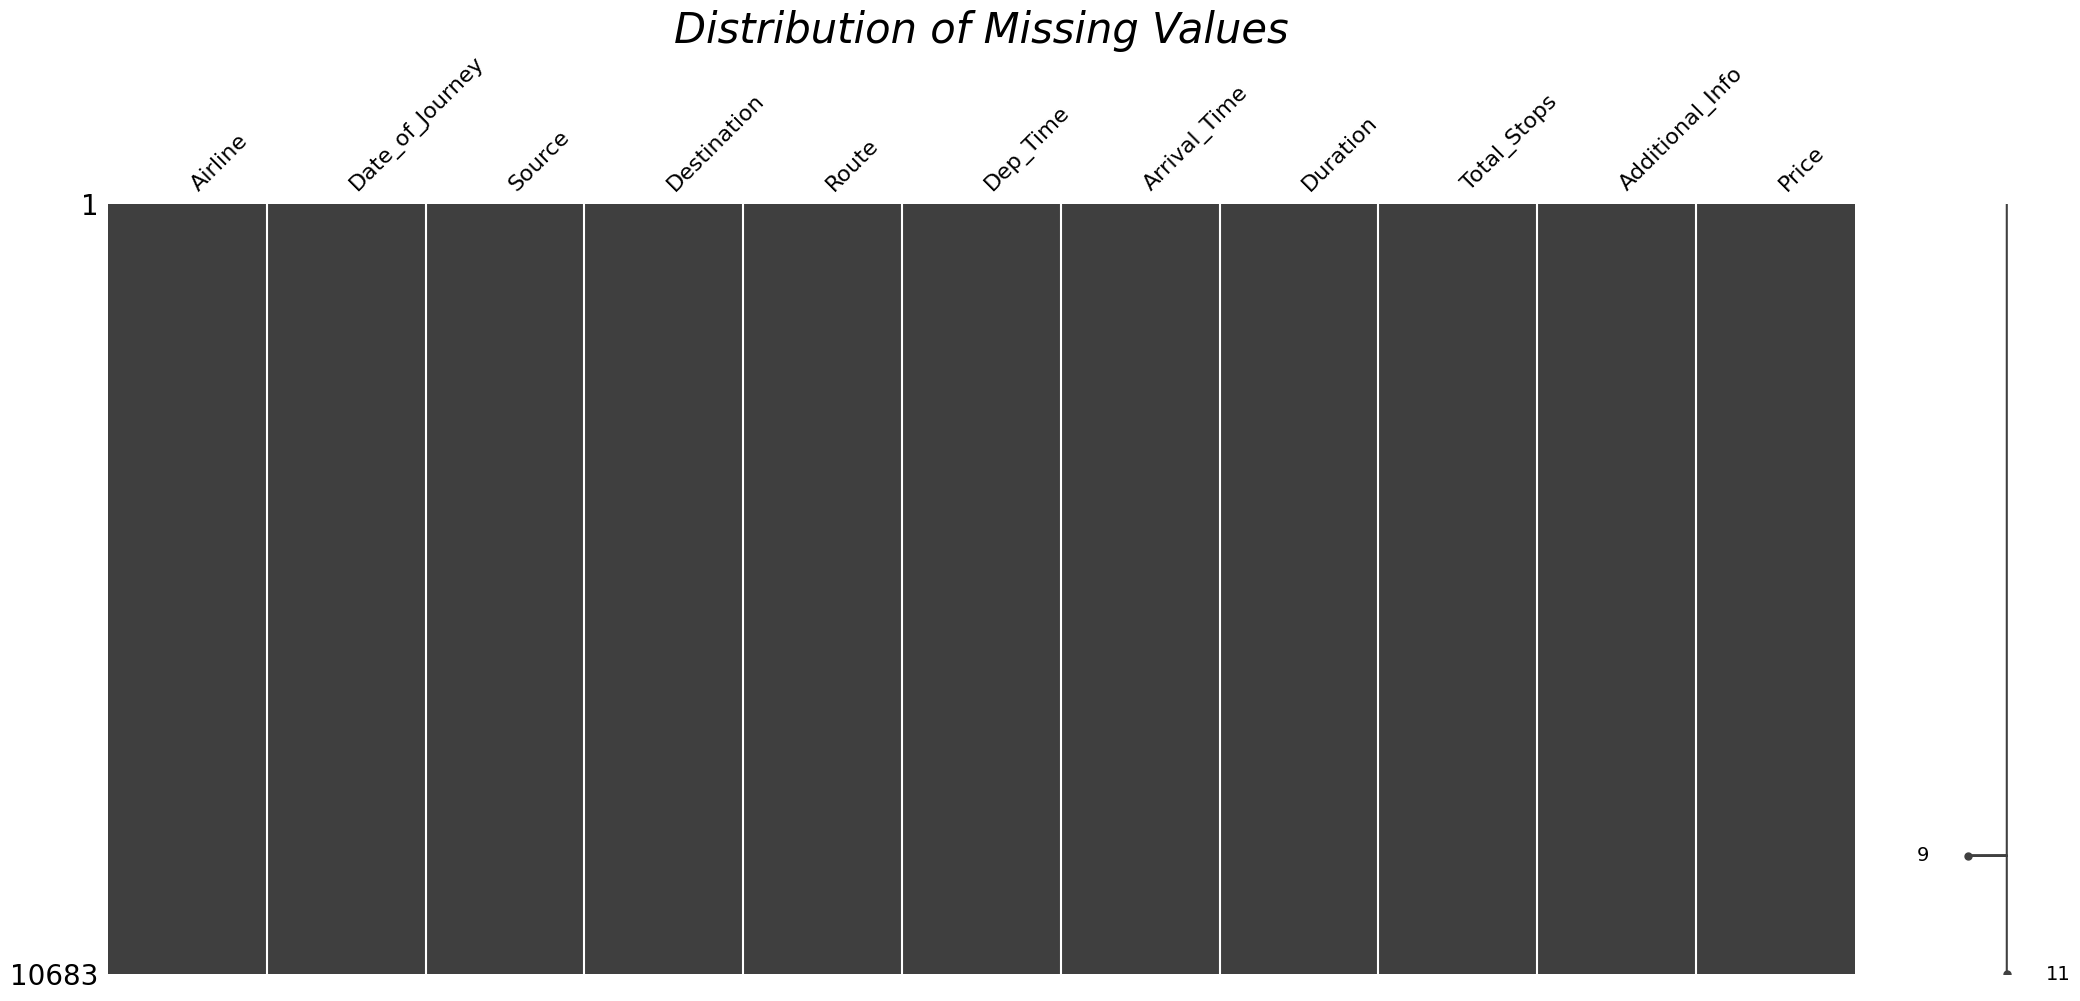

In [ ]:
msno.matrix(df_flight)
plt.title('Distribution of Missing Values', fontsize = 30, fontstyle='oblique')

In [ ]:
# To find the percentage of missing values to each column
for column in df_flight.columns:
    print("{} Missing Values Percentage : {:.2f}".format(column.ljust(50,' '),(df_flight[column].isnull().sum()/len(df_flight))*100))

Airline                                            Missing Values Percentage : 0.00
Date_of_Journey                                    Missing Values Percentage : 0.00
Source                                             Missing Values Percentage : 0.00
Destination                                        Missing Values Percentage : 0.00
Route                                              Missing Values Percentage : 0.01
Dep_Time                                           Missing Values Percentage : 0.00
Arrival_Time                                       Missing Values Percentage : 0.00
Duration                                           Missing Values Percentage : 0.00
Total_Stops                                        Missing Values Percentage : 0.01
Additional_Info                                    Missing Values Percentage : 0.00
Price                                              Missing Values Percentage : 0.00


**Observations:-**  Here the data set have no null values,so that the graph shows full black bars.

## **Data Pre_Processing**

In [ ]:
df_flight=df_flight.drop_duplicates(keep='first')  # Dropping Duplicate Records.

In [ ]:
df_flight.dropna(inplace=True)  # Drops the null value records.

In [ ]:
df_flight.shape

(10462, 11)

**Observations:-**  After deleting the null values ,the shape of dataset is same, means there is only two null values occur in data set.

###**Merging Delhi and New Delhi**

In [ ]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
df_flight['Destination'] = df_flight['Destination'].apply(newd)

###**4)Converting columns into appropriate Datatypes.**  And


###**5)Dropping columns in a DataFrame.**

In [ ]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


**Observations:-**  The columns Date_of_Journey,Arrival_Time ,Dep_Time ,Duration are in object data type.So that we have to convert this dat type into timestamp so as to use this columns properly for prediction.

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.date will extract only date of that date**

**.dt.month will extract only month from the date**

In [ ]:
df_flight['Journey_day']= pd.to_datetime(df_flight.Date_of_Journey,format='%d/%m/%Y').dt.day

In [ ]:
df_flight['Journey_month']= pd.to_datetime(df_flight.Date_of_Journey,format='%d/%m/%Y').dt.month

In [ ]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is if no use
df_flight.drop(['Date_of_Journey'], axis=1, inplace =True)

####**Draw a graph to show count of flights month wise**

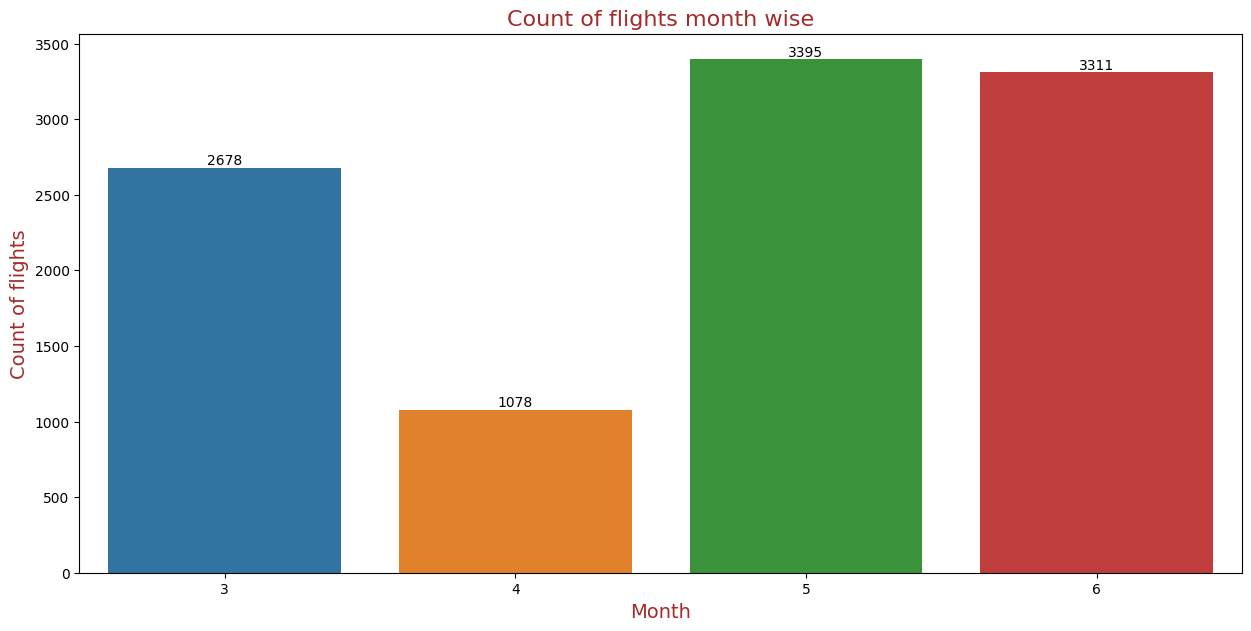

In [ ]:
figure=plt.figure(figsize=(15,7))
plt.title('Count of flights month wise',size=16,color='brown')
ax=sns.countplot(x = 'Journey_month', data = df_flight)
ax.bar_label(ax.containers[0],label_type='edge',ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Month',size=14,color='brown')
plt.ylabel('Count of flights',size=14,color='brown')
plt.show()

**Observations:**  There are around 3395 flights scheduled in the month of may so at this time can be the peak month for the airlines bcoz of summer vacation ,as compared to april which seems like slack season for airlines.

**Similarly Extracting Hours and minutes from Arrival_Time column**

In [ ]:
df_flight['Arrival_hour']= pd.to_datetime(df_flight.Arrival_Time).dt.hour

In [ ]:
df_flight['Arrival_min']= pd.to_datetime(df_flight.Arrival_Time).dt.minute

In [ ]:
# Since we have converted Arrival_Time column into integers, Now we can drop as it is if no use
df_flight.drop(['Arrival_Time'], axis=1, inplace =True)

In [ ]:
#**Similarly Extracting Hours and minutes from Dep_Time column**
#df_flight['Dep_hour']= pd.to_datetime(df_flight.Dep_Time).dt.hour

In [ ]:
#df_flight['Dep_min']= pd.to_datetime(df_flight.Dep_Time).dt.minute

In [ ]:
# Since we have converted Dep_Time column into integers, Now we can drop as it is if no use
#df_flight.drop(['Dep_Time'], axis=1, inplace =True)

**Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.**

In [ ]:
def flight_dep_time(X):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [ ]:
df_flight['flight_time'] = df_flight['Dep_Time'].apply(flight_dep_time)

####**Draw a Graph to Count of flights according to departure time**



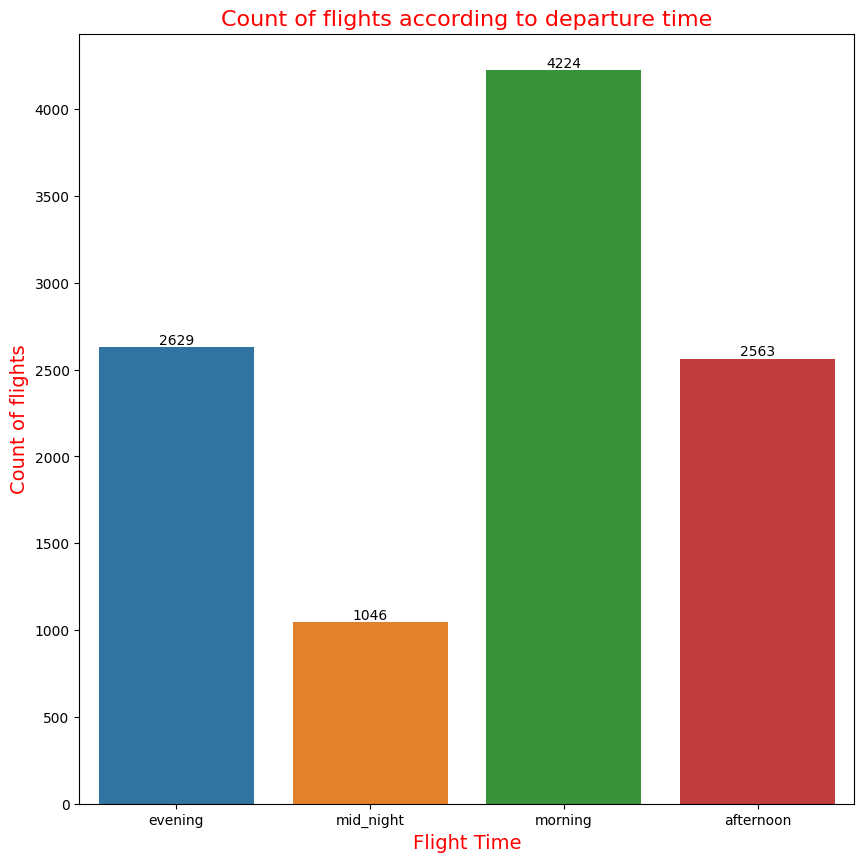

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time',size=16,color='red')
ax=sns.countplot(x = 'flight_time', data = df_flight)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel('Flight Time',size=14,color='red')
plt.ylabel('Count of flights',size=14,color='red')
plt.show()

Observations:-There are more number of flights in the morning time as compared to other time.

**After Dropping and Add aditional columns ,the data set will be**

In [ ]:
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10,evening
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15,mid_night


**Separate Duration hours and minute from duration**

In [ ]:
duration=list(df_flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
         if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i].strip() + ' 0m' # Adds 0 minute
         else:
             duration[i]='0h '+ duration[i]    # Adds 0 hour
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0]))  # Extract hours from duration
  duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  # Extracts only minutes

In [ ]:
df_flight['duration_hours']= duration_hours
df_flight['duration_mins']= duration_mins

In [ ]:
# Since we have converted Duration column into integers, Now we can drop as it is if no use
df_flight.drop(['Duration'], axis=1, inplace =True)

**Description of above steps:**

Line 1 – Creating a list of all the durations present in the data.

Line 2-7 – We are just bringing every duration to the same format. There might be a case when some flight duration will be just 30m so we will write it as ‘0h 30m’ and there may also be cases like 2h so we will write it as ‘2h 0m’.

Line 10 –12 Simply split it into 2 components, hour and minute.

Add two columns ‘Duration_hours’ and ‘Duration_mins’.

Drop the original Duration column.


####**Draw a scatter plot for Price VS duration of flights**

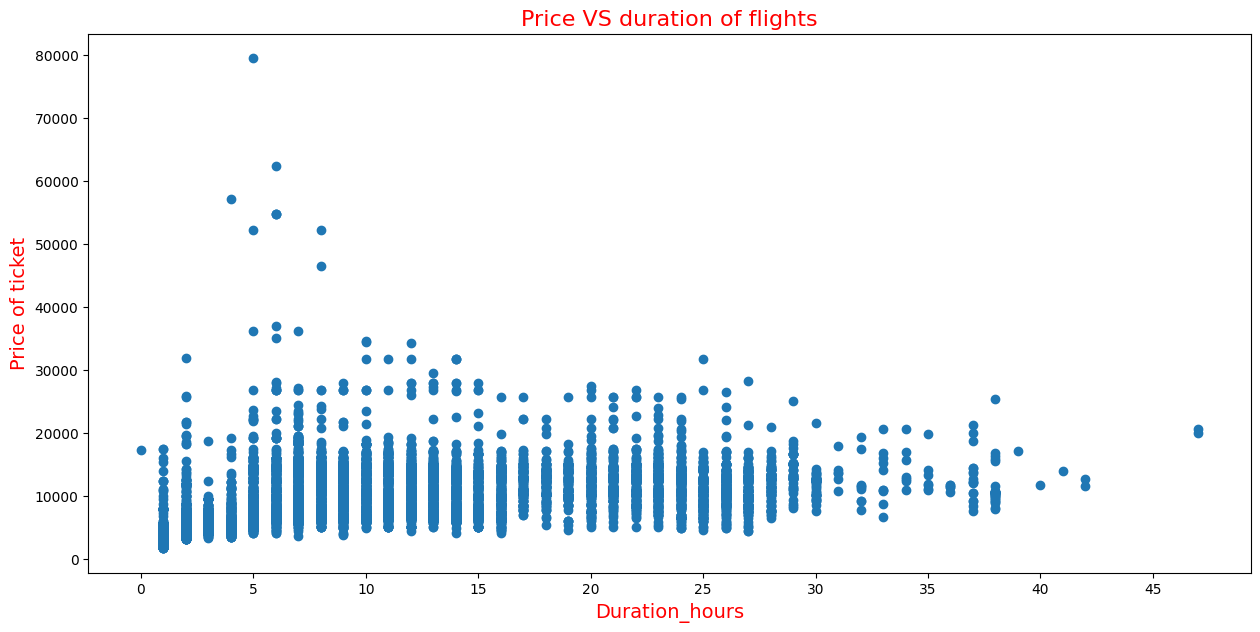

In [ ]:
plt.figure(figsize = (15, 7))
plt.title('Price VS duration of flights',size=16,color='red')
plt.scatter(df_flight['duration_hours'], df_flight['Price'])
plt.xlabel('Duration_hours',size=14,color='red')
plt.xticks(ticks=np.arange(0,50,5))
plt.ylabel('Price of ticket',size=14,color='red')
plt.show()

**Observations:**  Here one outlier occured at anove 70,000. It effects to the remaining values, So drop that value.

In [ ]:
df_flight[df_flight.Price > 70000] # To see the outlier record

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time,duration_hours,duration_mins
2924,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,05:45,1 stop,Business class,79512,1,3,11,25,mid_night,5,40


In [ ]:
df_flight.drop(df_flight[df_flight.Price > 70000].index,inplace=True) # deleting the row which price value > 70000

**Scatter plot after deletion of outlier**

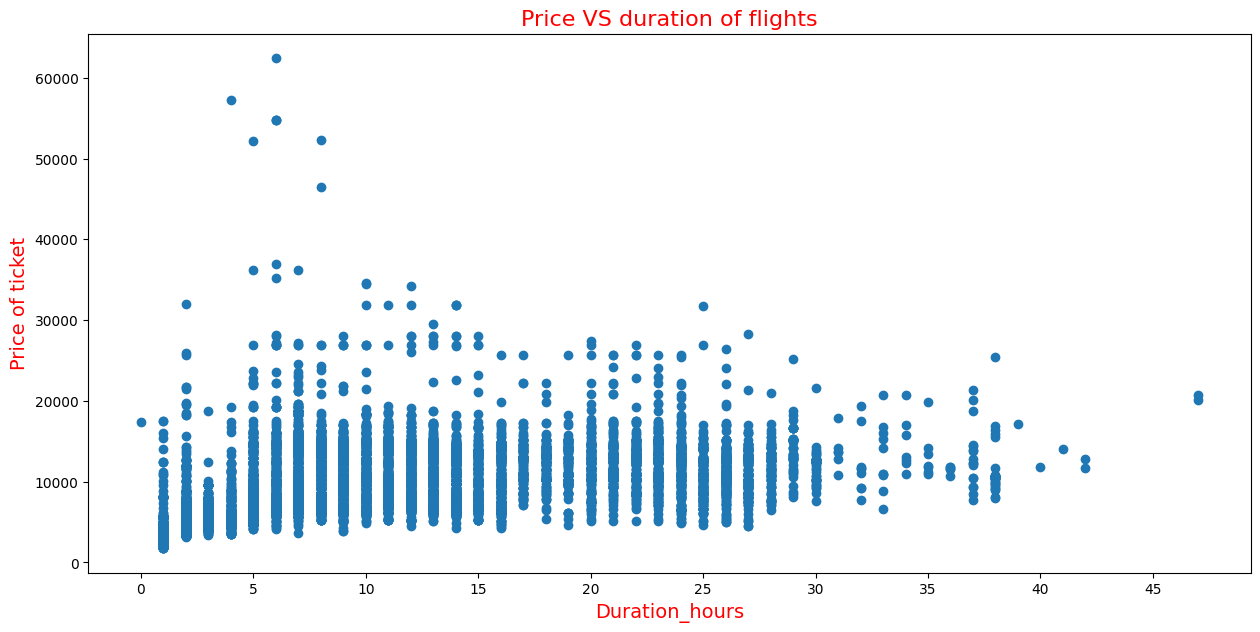

In [ ]:
plt.figure(figsize = (15, 7))
plt.title('Price VS duration of flights',size=16,color='red')
plt.scatter(df_flight['duration_hours'], df_flight['Price'])
plt.xlabel('Duration_hours',size=14,color='red')
plt.xticks(ticks=np.arange(0,50,5))
plt.ylabel('Price of ticket',size=14,color='red')
plt.show()

**Observations:** Most of the  flight prices were below 25000 .

In [ ]:
df_flight.corr()

<ipython-input-107-c06760b03e50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_flight.corr()


,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,duration_hours,duration_mins
Price,1.000000,-0.158688,-0.112534,0.031887,-0.087161,0.510786,-0.134183
Journey_day,-0.158688,1.000000,-0.038544,-0.002498,-0.015085,-0.029470,-0.009147
Journey_month,-0.112534,-0.038544,1.000000,0.001374,-0.099269,0.006327,-0.046233
Arrival_hour,0.031887,-0.002498,0.001374,1.000000,-0.152036,0.065568,-0.116667
Arrival_min,-0.087161,-0.015085,-0.099269,-0.152036,1.000000,-0.075942,0.156179
duration_hours,0.510786,-0.029470,0.006327,0.065568,-0.075942,1.000000,-0.133965
duration_mins,-0.134183,-0.009147,-0.046233,-0.116667,0.156179,-0.133965,1.000000


**Observations:**  The relation between price and duration_hours have high corelation.

#**sns heat map to show correlation between columns**

<ipython-input-108-4b5b9b423cd8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flight.corr(), annot=True)


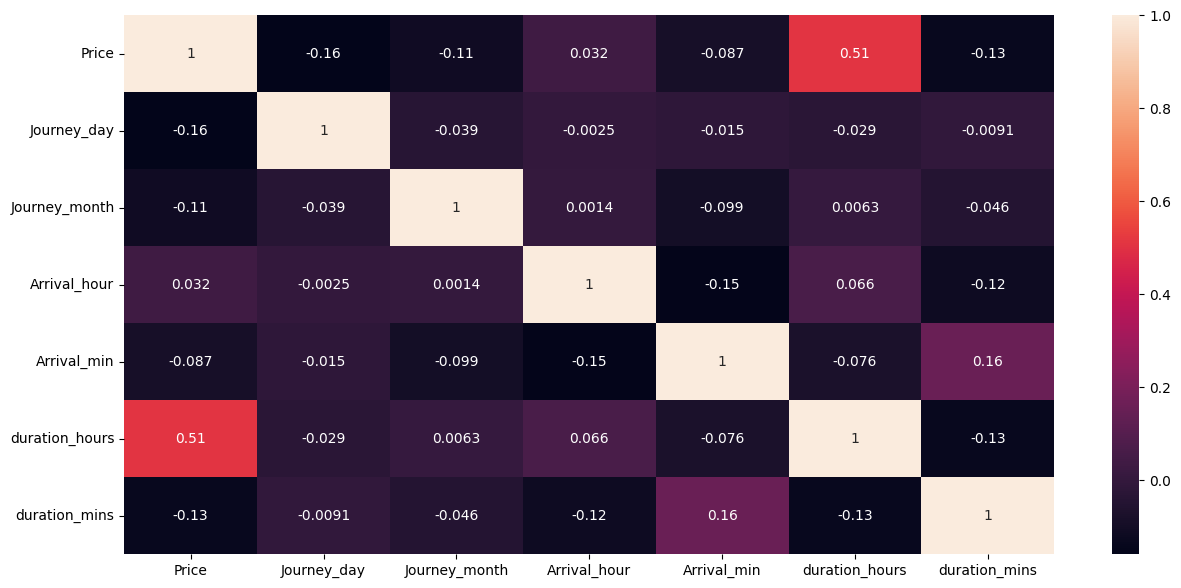

In [ ]:
figure=plt.figure(figsize=(15,7))
sns.heatmap(df_flight.corr(), annot=True)
plt.show()

####**Draw a Graph for Price**

<Axes: >

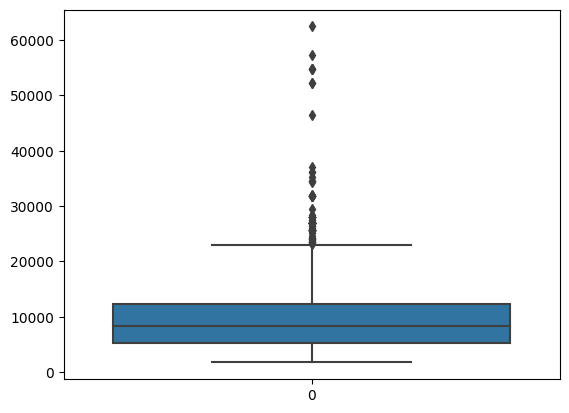

In [ ]:
sns.boxplot(df_flight['Price'])

**Observations:** As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also.

###**Handling Categorical Data**

Categorical data are two types:

1)**Nominal Data**-  Data are not in any order- ex: states(we can't say order of states,nothing is greater than other thing)-OneHotEncoder is used in this case

2)**Ordinal Data**- Data are in order-Ex: Ranking(give ranks to students)-LabelEncoder is used in this case.

####**Now Working with Airline Feature**

In [ ]:
df_flight.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Observations:**  Here we can't say that Jet Airways greater than IndiGo etc. For that here we are going to do OneHotEncoder.

#####**Draw a Graph to show the Count of flights with different Airlines**

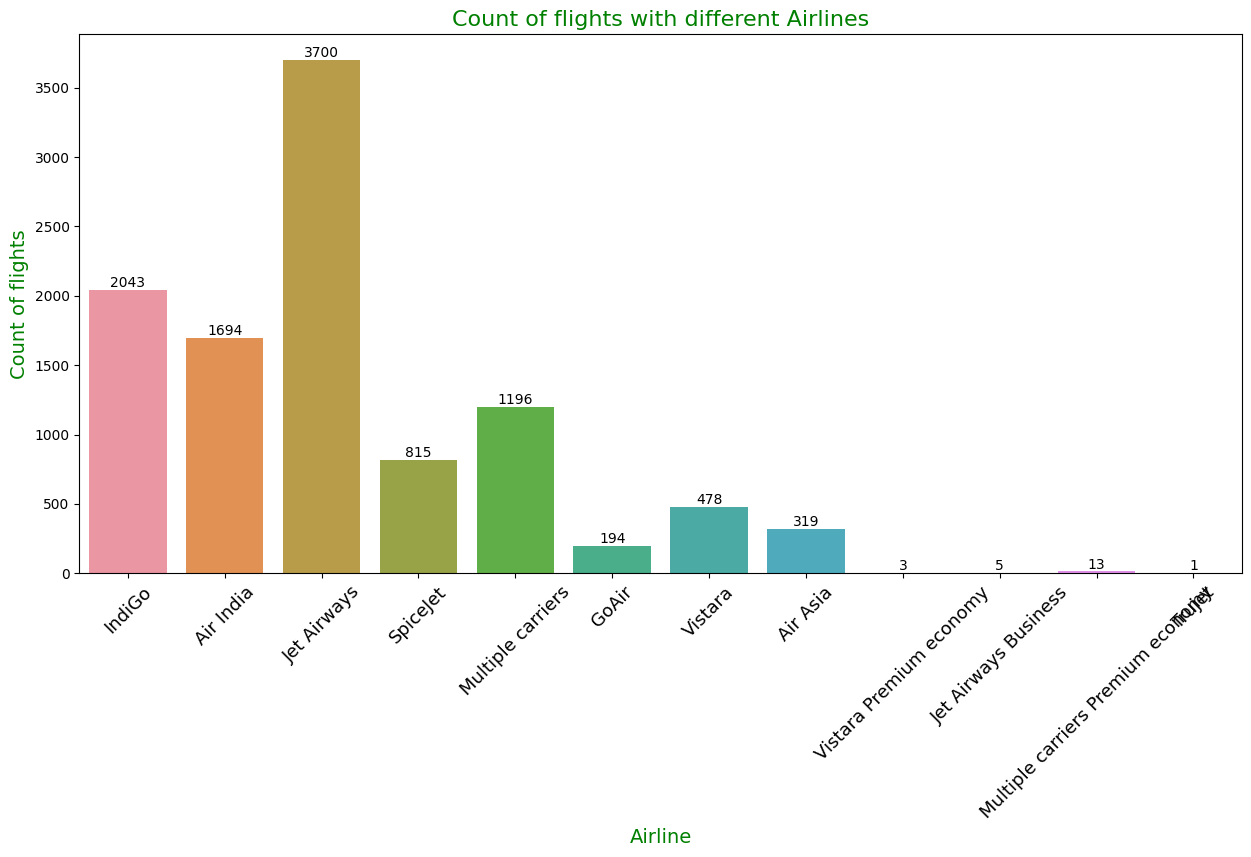

In [ ]:
figure=plt.figure(figsize=(15,7))
plt.title('Count of flights with different Airlines',size=16,color='green')
ax=sns.countplot(x = 'Airline', data = df_flight)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel('Airline',size=14,color='green')
plt.ylabel('Count of flights',size=14,color='green')
plt.xticks(rotation=45,size=13)
plt.show()

In [ ]:
# As AirLine is Nominal Categorical data We will perform OneHotEncoding
Airline =df_flight[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#####**Graph Airline vs Price**

<Figure size 1500x700 with 0 Axes>

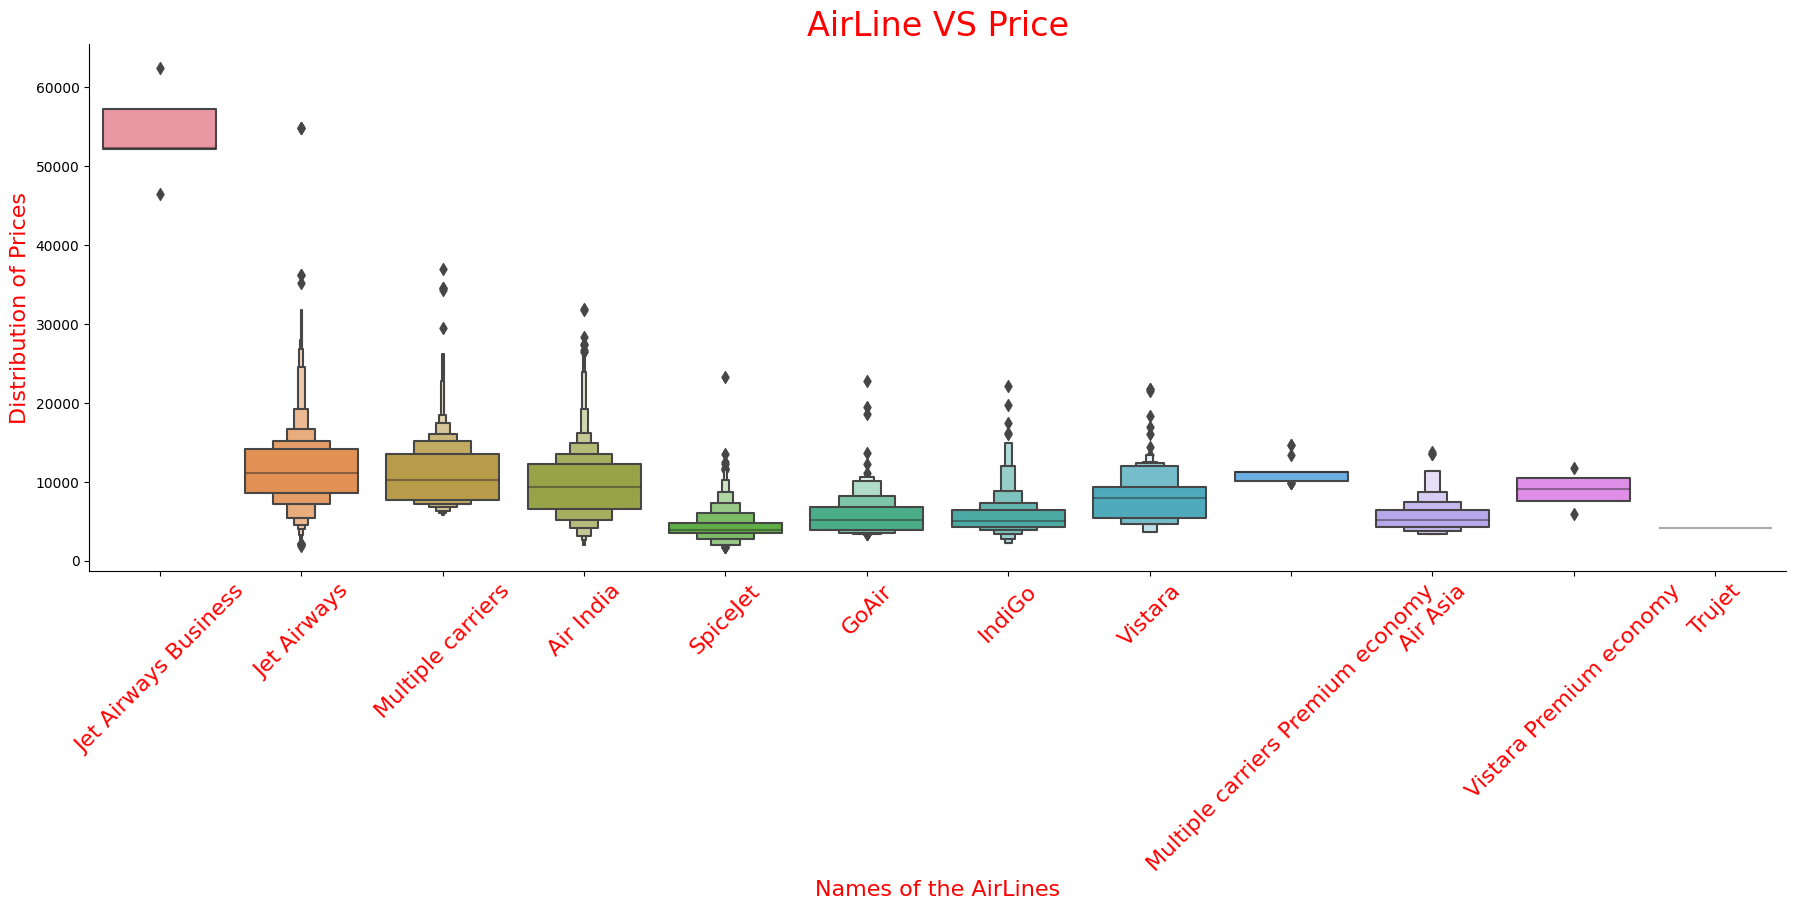

In [ ]:
figure=plt.figure(figsize=(15,7))
sns.catplot(x='Airline',y='Price',data=df_flight.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45,size=16,color='red')
plt.xlabel('Names of the AirLines',size=16,color='red')
plt.ylabel('Distribution of Prices',size=16,color='red')
plt.title("AirLine VS Price",size=24,color='red')
plt.show()

**Observations:**  Here we see that Jet Airways Business have the highest price. Apart from that all are having the similar median.

####**Now Working with Source Feature**

In [ ]:
df_flight.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2178
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
# As Source is Nominal Categorical data We will perform OneHotEncoding
Source =df_flight[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


**Observatoins:** Here header doesn't shows the Banglore that means the first row all 0's indicates Bnaglore.

#####**Graph Source vs Price using seaborn library**

<Figure size 1500x700 with 0 Axes>

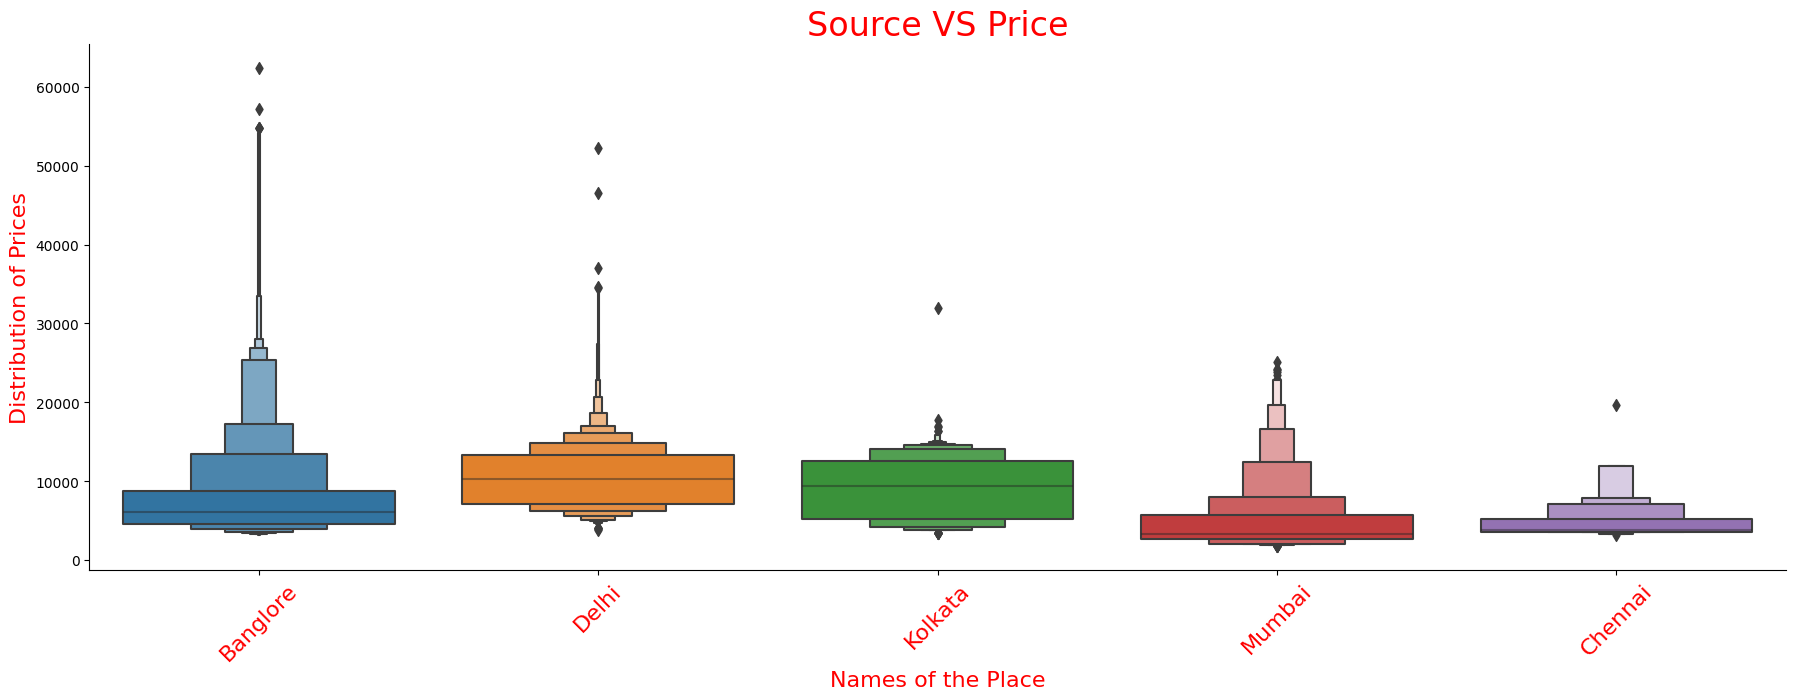

In [ ]:
figure=plt.figure(figsize=(15,7))
sns.catplot(x='Source',y='Price',data=df_flight.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45,size=16,color='red')
plt.xlabel('Names of the Place',size=16,color='red')
plt.ylabel('Distribution of Prices',size=16,color='red')
plt.title("Source VS Price",size=24,color='red')
plt.show()

**Observations:-**  Here some places have outliers ,from that Banglore had high outliers ,means the price of Banglore is high compared to all.

####**Now Working with Destination Feature**

In [ ]:
df_flight.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        2178
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#####**Draw a Graph to Destination**

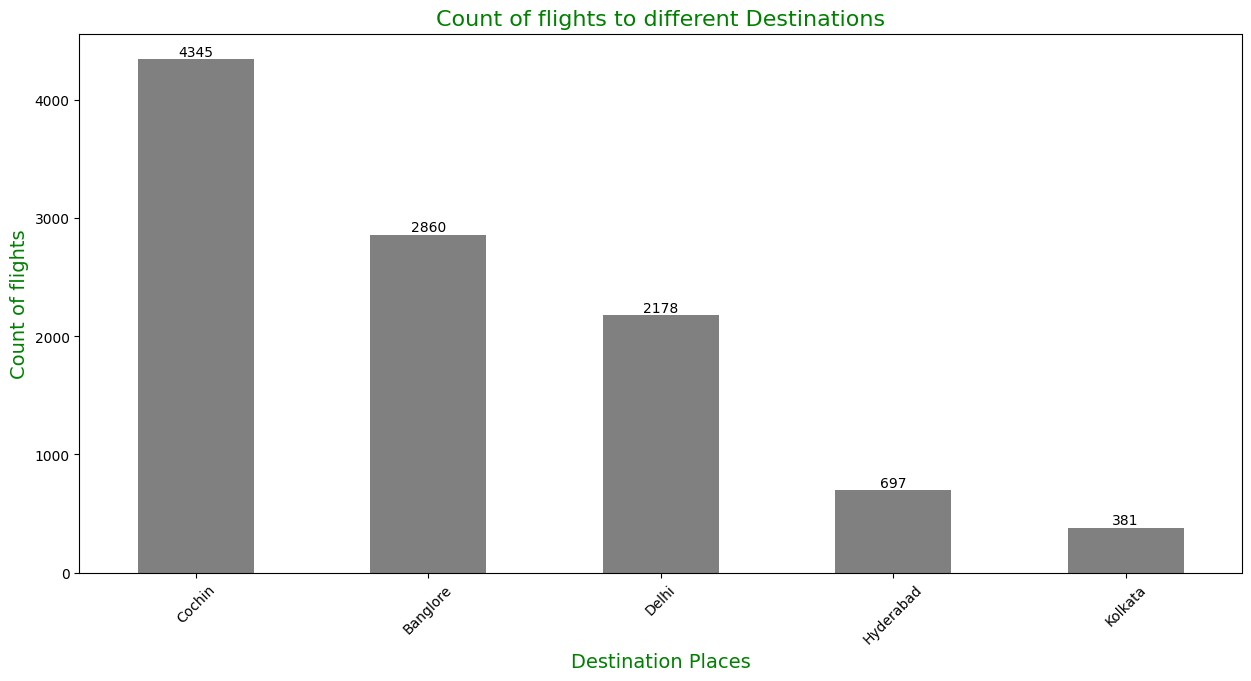

In [ ]:
figure=plt.figure(figsize=(15,7))
ax=df_flight.Destination.value_counts().plot.bar(color='gray')
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel('Destination Places',size=14,color='green')
plt.ylabel('Count of flights',size=14,color='green')
plt.xticks(rotation=45)
plt.title('Count of flights to different Destinations',size=16,color='green')
plt.show()

**Observations:-**  Most of the  passengers booked flight to cochin.

##### **Graph to show Total stops of flights to different Destinations**

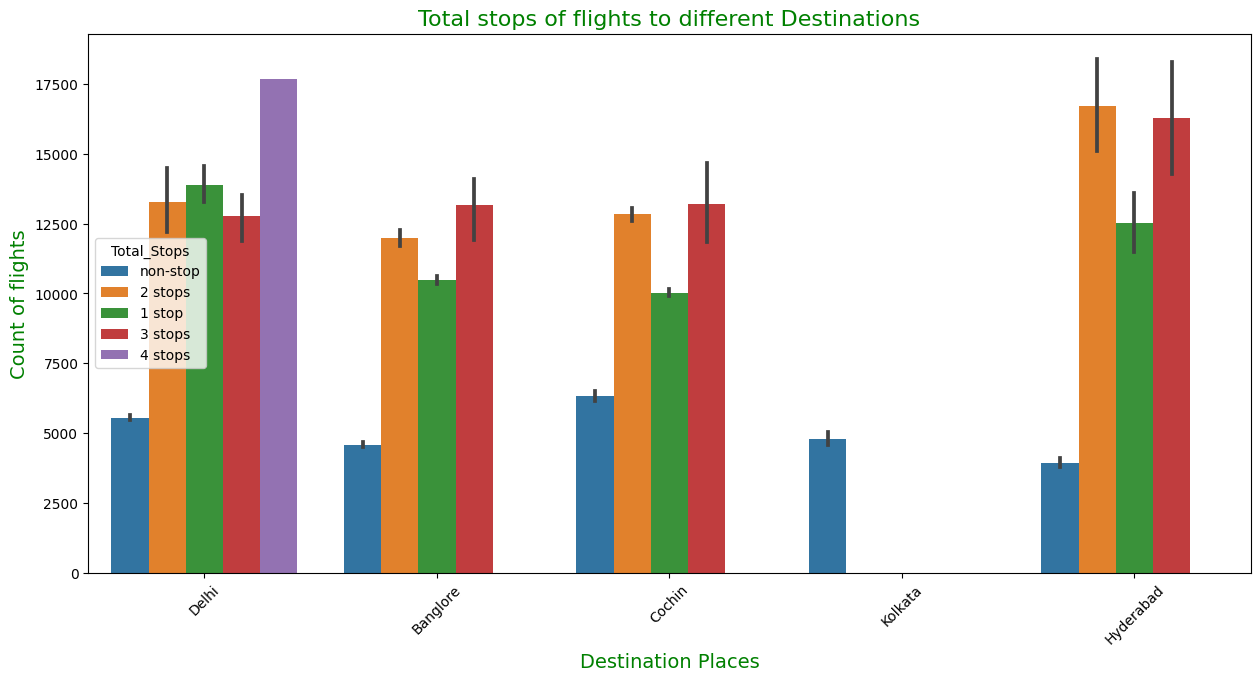

In [ ]:
figure=plt.figure(figsize=(15,7))
ax=sns.barplot(x=df_flight.Destination,y=df_flight.Price,hue=df_flight.Total_Stops)
plt.xlabel('Destination Places',size=14,color='green')
plt.ylabel('Count of flights',size=14,color='green')
plt.xticks(rotation=45)
plt.title('Total stops of flights to different Destinations',size=16,color='green')
plt.show()

**Observations:** Only New Delhi have 4 stops, Rest of destinations have three and less than three stops.

#####**Graph to draw  Destination vs Price**

<Figure size 1500x700 with 0 Axes>

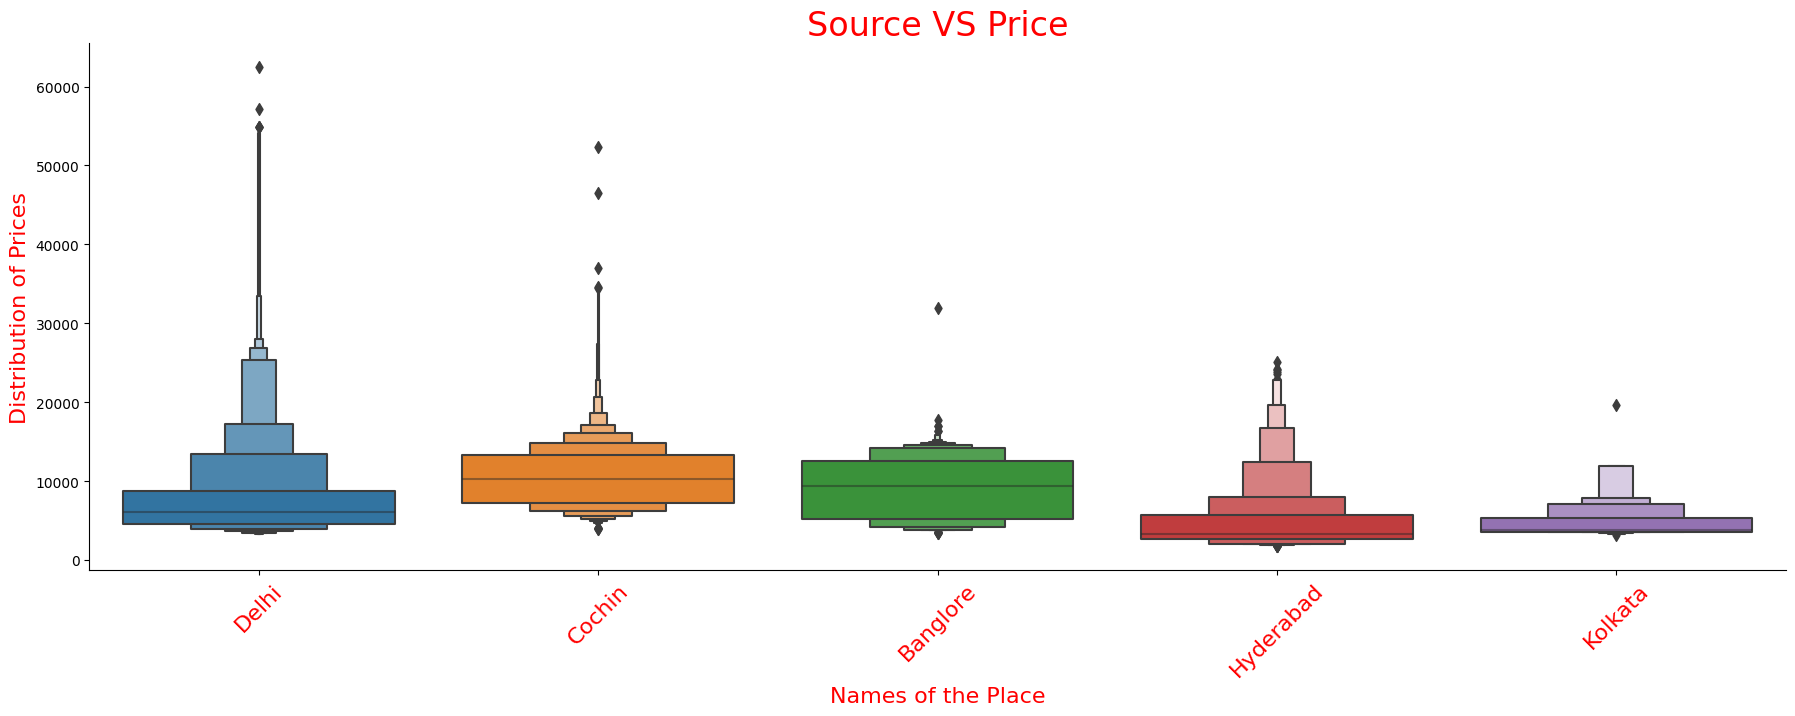

In [ ]:
figure=plt.figure(figsize=(15,7))
sns.catplot(x='Destination',y='Price',data=df_flight.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45,size=16,color='red')
plt.xlabel('Names of the Place',size=16,color='red')
plt.ylabel('Distribution of Prices',size=16,color='red')
plt.title("Source VS Price",size=24,color='red')
plt.show()

**Observations:**The plot above says that if you are going to New Delhi, no matter from where, you have to pay the highest amount of money.

In [ ]:
# As Destination is Nominal Categorical data We will perform OneHotEncoding
Destination =df_flight[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


####**Now Working with Route &  Additional_Info Feature**

In [ ]:
df_flight.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10461, dtype: object

In [ ]:
df_flight.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
len(df_flight[df_flight['Additional_Info'] =='No info'])

8182

In [ ]:
per_info=len(df_flight[df_flight['Additional_Info'] =='No info'])/len(df_flight['Additional_Info'] )*100

In [ ]:
per_info

78.2143198546984

In [ ]:
# Additional_Info contains almost 80% of no_info, So dropping the column
# Route and Total_stops are relate to each other, so there is no use of route,Dropping the Route column.
df_flight.drop(['Route','Additional_Info'],axis=1,inplace=True)

####**Now Working with Total_Stops Feature**

In [ ]:
df_stops=df_flight['Total_Stops'].value_counts()

In [ ]:
#  As Total_Stops is Ordinal Categorical type We will perform LabelEncoding
# Here values are assigned with corresponding keys
df_flight.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [ ]:
df_flight.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time,duration_hours,duration_mins
0,IndiGo,Banglore,Delhi,22:20,0,3897,24,3,1,10,evening,2,50
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,13,15,mid_night,7,25
2,Jet Airways,Delhi,Cochin,09:25,2,13882,9,6,4,25,morning,19,0
3,IndiGo,Kolkata,Banglore,18:05,1,6218,12,5,23,30,evening,5,25
4,IndiGo,Banglore,Delhi,16:50,1,13302,1,3,21,35,afternoon,4,45


#####**Pie chart to show the percentage of stops**

In [ ]:
fig = px.pie(df_flight, values=df_stops, names=df_stops.index)
fig.show()

**Observations:** 53% flights have only one stop.

##**Making a new Data Frame**

In [ ]:
# Concatenate Data Frame --> df_flight + AirLine  + Source + Destination
df_price=pd.concat([df_flight,Airline ,Source,Destination],axis=1)

In [ ]:
df_price.head(2)

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,22:20,0,3897,24,3,1,10,evening,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,13,15,mid_night,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Drop the 'Airline','Source','Destination' columns
df_price.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
df_price.head(2)

,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,22:20,0,3897,24,3,1,10,evening,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,05:50,2,7662,1,5,13,15,mid_night,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# We have taken all the columns except the Price column, which is our target column.
X= df_price.drop('Price',axis=1)

In [ ]:
X.shape

(10461, 28)

In [ ]:
X.head(2)

,Dep_Time,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,flight_time,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,22:20,0,24,3,1,10,evening,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,05:50,2,1,5,13,15,mid_night,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Take out df_price data labels except price.
Y=df_price['Price']

###**Checking Correlations between columns.**

<ipython-input-159-98fd1befe1e1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

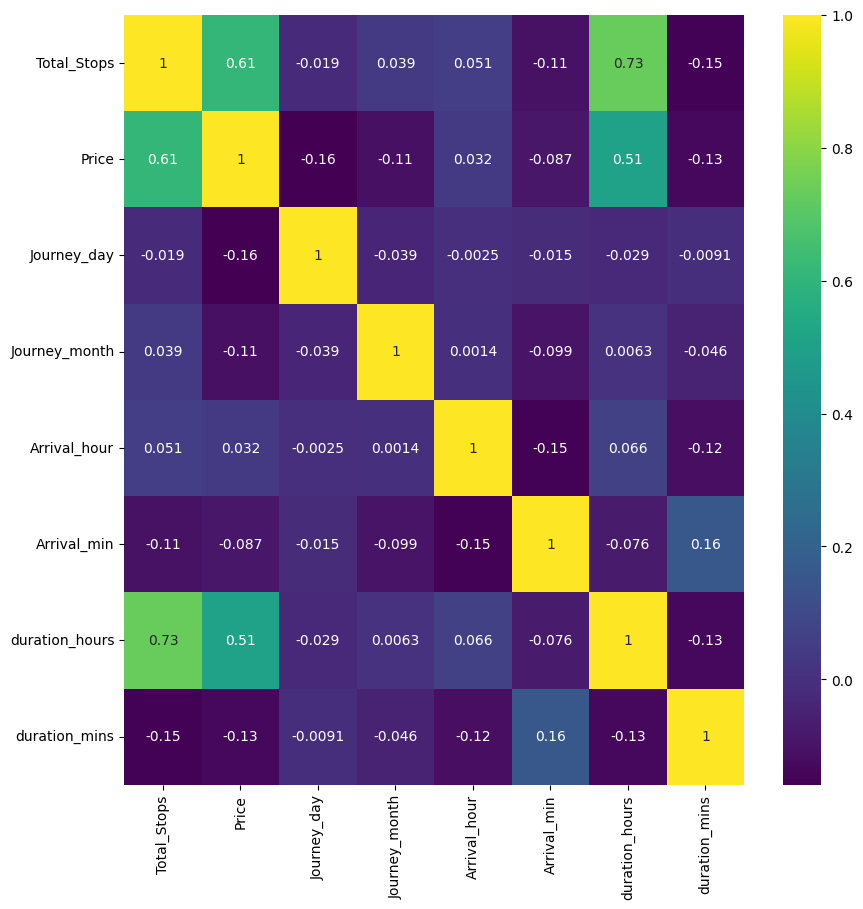

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_flight.corr(),cmap='viridis',annot=True)

**Observations:**

Just checking the correlation between different features of training data.

We can see that Total_stops is highly correlated with Duration_hours which is very obvious. If the no. of stops would increase, the duration hours of the flight will also increase.

Also, price is highly correlated with total stops because if stops would increase that would also require a high quantity of fuel, and that would increase the price.

#**Work with Another Data File**

## Test Data

In [ ]:
test_data = pd.read_excel('/content/Test_set.xlsx')

In [ ]:
test_data.head(2)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


**Observations:-** Features same like df_flight except price. This data set doesn't had price column.
  The columns Date_of_Journey,Arrival_Time ,Dep_Time ,Duration are in object data type.So that we have to convert this dat type into timestamp so as to use this columns properly for prediction.

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.date will extract only date of that date**

**.dt.month will extract only month from the date**

In [ ]:
test_data['Journey_day']= pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [ ]:
test_data['Journey_month']= pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [ ]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,5


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is if no use
test_data.drop(['Date_of_Journey'], axis=1, inplace =True)

**Similarly Extracting Hours and minutes from Dep_Time column**

In [ ]:
test_data['Dep_hour']= pd.to_datetime(test_data.Dep_Time).dt.hour

In [ ]:
test_data['Dep_min']= pd.to_datetime(test_data.Dep_Time).dt.minute

In [ ]:
# Since we have converted Dep_Time column into integers, Now we can drop as it is if no use
test_data.drop(['Dep_Time'], axis=1, inplace =True)

**Similarly Extracting Hours and minutes from Arrival_Time column**

In [ ]:
test_data['Dep_hour']= pd.to_datetime(test_data.Arrival_Time).dt.hour

In [ ]:
test_data['Dep_min']= pd.to_datetime(test_data.Arrival_Time).dt.minute

In [ ]:
# Since we have converted Arrival_Time column into integers, Now we can drop as it is if no use
test_data.drop(['Arrival_Time'], axis=1, inplace =True)

**Separate Duration hours and minute from duration**

In [ ]:
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
         if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i].strip() + ' 0m' # Adds 0 minute
         else:
             duration[i]='0h '+ duration[i]    # Adds 0 hour
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0]))  # Extract hours from duration
  duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  # Extracts only minutes

In [ ]:
test_data['duration_hours']= duration_hours
test_data['duration_mins']= duration_mins

In [ ]:
# Since we have converted Duration column into integers, Now we can drop as it is if no use
test_data.drop(['Duration'], axis=1, inplace =True)

##**Handling Categorical Data**

####**Now Working with Airline Feature**

In [ ]:
test_data.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [ ]:
# As AirLine is Nominal Categorical data We will perform OneHotEncoding
Airline =test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


####**Now Working with Source Feature**

In [ ]:
test_data.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [ ]:
# As Source is Nominal Categorical data We will perform OneHotEncoding
Source =test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


####**Now Working with Destination Feature**

In [ ]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [ ]:
# As Destination is Nominal Categorical data We will perform OneHotEncoding
Destination =test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


####**Now Working with Route &  Additional_Info Feature**

In [ ]:
test_data.Route.value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64

In [ ]:
test_data.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [ ]:
# Additional_Info contains almost 80% of no_info, So dropping the column
# Route and Total_stops are relate to each other, so there is no use of route,Dropping the Route column.
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

####**Now Working with Total_Stops Feature**

In [ ]:
test_data.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#  As Total_Stops is Ordinal Categorical type We will perform LabelEncoding
# Here values are assigned with corresponding keys
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [ ]:
test_data.head(2)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_min,Dep_hour,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,25,4,10,55
1,IndiGo,Kolkata,Banglore,1,5,5,20,10,4,0


##**Making a new Data Frame**

In [ ]:
# Concatenate Data Frame --> df_flight + AirLine  + Source + Destination
df_flight_price=pd.concat([test_data,Airline ,Source,Destination],axis=1)

In [ ]:
df_flight_price.head(2)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_min,Dep_hour,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,25,4,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,5,5,20,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_flight_price.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
df_flight_price.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_min,Dep_hour,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,25,4,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,5,20,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_flight_price.shape

(2671, 26)